In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Defining the number of rows and columns to be visible
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

# Defining plot style
plt.style.use('ggplot')

# 1. Importing Data

In [2]:
bank_customer_df = pd.read_csv('data/churn-modelling.zip')

display(bank_customer_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Given:**

* Here, the target column is `Exited`
* The value in the `Exited` column can either be `0` or `1`  
    
    * Where `0` signifies that the customer is retained
    
    * and `1` signifies that customer exited the bank

## 1.1 Inspecting data shape

In [3]:
bank_customer_df.shape

(10000, 14)

**Observation:** There are 10000 rows and 14 columns in the data

## 1.2 Checking the data type of columns and null values (if exists)

In [4]:
bank_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation:** The data type associated with every columns are all correct.

# 2. Getting the unique value count of every column

### Following things will be inferred:


#### a. Columns that can be dropped directly

* Columns that have only unique value

* Columns that have only a single value


#### b. Specification of the collected data

In [5]:
def print_unique_count(df):
    df_columns = df.columns
    
    for col in df_columns:
        print(col, df[col].nunique())

In [6]:
print_unique_count(bank_customer_df)

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


**Observation:**

* The collected data is of 10000 customers
* `RowNumber` and `CustomerId` columns need to be dropped since they are all unique values.
* The data is collected from 3 different geographies of different age groups.

## 2.1 Dropping the columns

In [7]:
bank_customer_df = bank_customer_df.drop(columns=['RowNumber', 'CustomerId'])

# 3. Descriptive Analysis

**Columns to work upon**

In [8]:
display(bank_customer_df.columns.tolist())

['Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## 3.1 Univariate Analysis

### 3.1.1 Countries participated in the survey

In [9]:
display(bank_customer_df['Geography'].unique().tolist())

['France', 'Spain', 'Germany']

So, we have the data from three different countries i.e. **France, Spain and Germany**.

### 3.1.2 What is the distribution of the countries in the data?

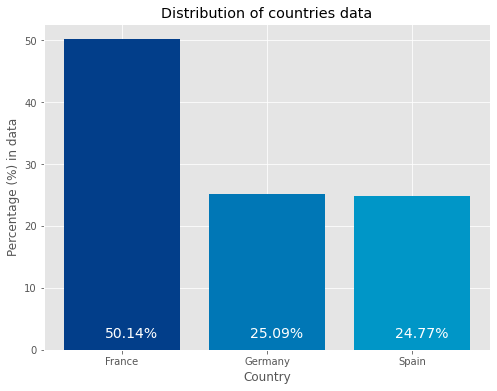

In [10]:
geography_count = bank_customer_df['Geography'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(geography_count.index, geography_count.values*100, 
        color=['#023E8A', '#0077B6', '#0096C7'])

for i, val in enumerate(geography_count.values*100):
    plt.annotate('{}%'.format(round(val, 2)), xy=(0, 0), xytext=(-0.12+i, 2),
             fontsize=14, color='#FFFFFF')

plt.xlabel('Country')
plt.ylabel('Percentage (%) in data')
plt.title('Distribution of countries data')

plt.show()

**Observation:** The majority of the data is collected from **France**.

### 3.1.3 Distribution of Churn

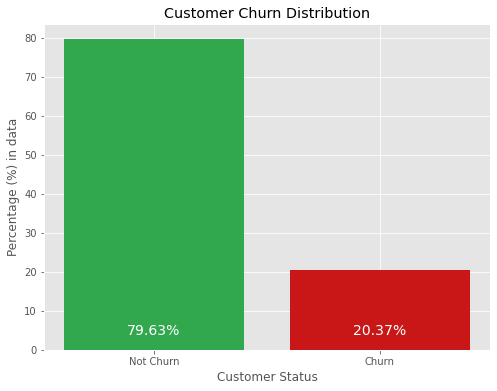

In [11]:
churn_count = bank_customer_df['Exited'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(churn_count.index, churn_count.values*100, 
        color=['#32a84e', '#c91616'])

for i, val in enumerate(churn_count.values*100):
    plt.annotate('{}%'.format(round(val, 2)), xy=(0, 0), xytext=(-0.12+i, 4),
             fontsize=14, color='#FFFFFF')

plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Customer Status')
plt.ylabel('Percentage (%) in data')
plt.title('Customer Churn Distribution')

plt.show()

### 3.1.4 Distribution of churn rate by country

In [12]:
# Calculating the count of Exited customers by geography
customer_exited_by_geo_count = bank_customer_df.groupby(['Geography', 'Exited'])['Exited'].agg({'count'})

# Normalizing the count
normalized_exited_by_geo = customer_exited_by_geo_count / customer_exited_by_geo_count.groupby(level=0).sum()

# Multiplying by 100 and rounding off the value upto 2 decimal places to increase the readability
normalized_exited_by_geo['count'] = normalized_exited_by_geo['count'].apply(lambda x: round(x*100, 2))

# Resetting index
normalized_exited_by_geo = normalized_exited_by_geo.reset_index()

normalized_exited_by_geo

,Geography,Exited,count
0,France,0,83.85
1,France,1,16.15
2,Germany,0,67.56
3,Germany,1,32.44
4,Spain,0,83.33
5,Spain,1,16.67


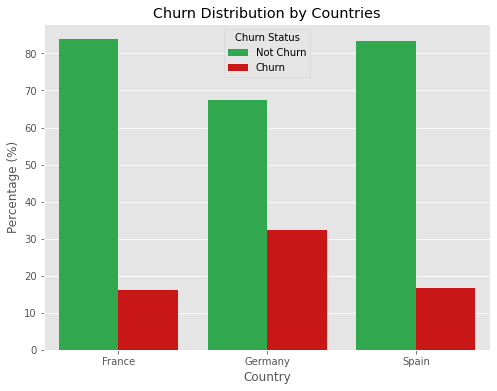

In [13]:
# Customizing plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Geography', y='count', hue='Exited',
                 data=normalized_exited_by_geo,
                 palette=['#32a84e', '#c91616'], saturation=1)

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Country')
ax.set_title('Churn Distribution by Countries')

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Not Churn', 'Churn'], title="Churn Status")
plt.show()

**Observation:**

* Need to inspect the factors contributing to increase in the churn rate in Germany
* One thing that is surprising is that the churn and not churn rate of **France** and **Spain** are quite similar

### 3.1.5 Is churn depends upon Gender?

#### 3.1.5.1 Inspecting churn rate by Gender

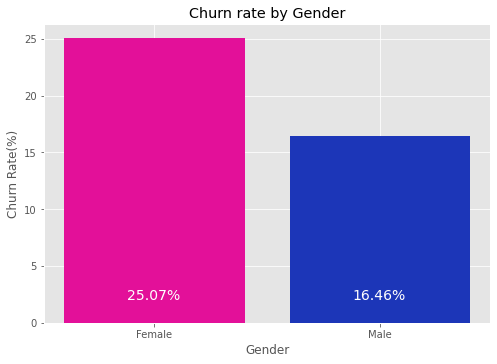

In [14]:
churn_by_gender = bank_customer_df.groupby(['Gender'])['Exited'].agg({'mean'}).reset_index()
churn_by_gender.columns = ['gender', 'churn_rate']

churn_by_gender['churn_rate'] = np.round(churn_by_gender.churn_rate * 100, 2)

plt.figure(figsize=(8, 5.5))
plt.bar(churn_by_gender.gender, churn_by_gender.churn_rate,
        color=['#e31099', '#1c36b8'])

for i, val in enumerate(churn_by_gender.churn_rate):
    plt.annotate('{}%'.format(round(val, 2)),
                 xy=(0, 0), xytext=(-0.12+i, 2),
                 fontsize=14, color='#FFFFFF')

plt.title('Churn rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate(%)')
plt.show()

**Observation:**

* Females usually exited the bank more than Males
* The likelihood of a female exiting the bank is higher than Male

**Concern:** Now the question here is that does this relation holds true only for the overall data or by Geography also.

#### 3.1.5.2 Inspecting churn rate of Gender by Country

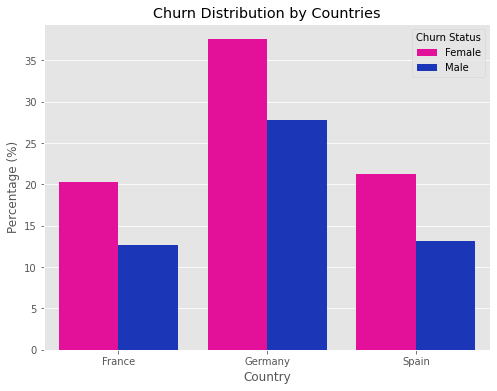

In [15]:
gender_churn_by_geo = bank_customer_df.groupby(['Gender', 'Geography'])['Exited'].agg({'mean'}).reset_index()
gender_churn_by_geo.columns = ['gender', 'geography', 'churn_rate']

gender_churn_by_geo['churn_rate'] = np.round(gender_churn_by_geo.churn_rate*100, 2)

# Customizing plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='geography', y='churn_rate', hue='gender',
                 data=gender_churn_by_geo,
                 palette=['#e31099', '#1c36b8'], saturation=1)

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Country')
ax.set_title('Churn Distribution by Countries')

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Female', 'Male'], title="Churn Status")
plt.show()

**Conclusion:** The higher churn rate for Female holds true by country also.

### 3.1.6 Is churn depends upon the customer's credit score?

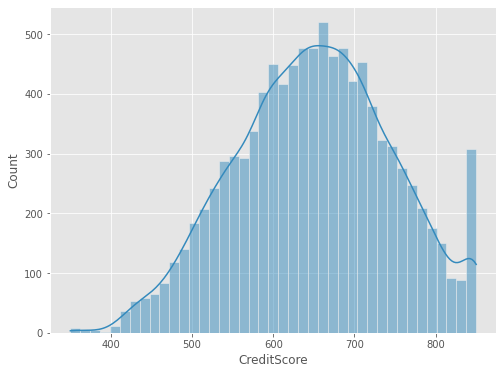

In [16]:
plt.figure(figsize=(8, 6))

sns.histplot(x='CreditScore', data=bank_customer_df, kde=True)
plt.show()

#### 3.1.6.1 Analyzing churn rate by credit score

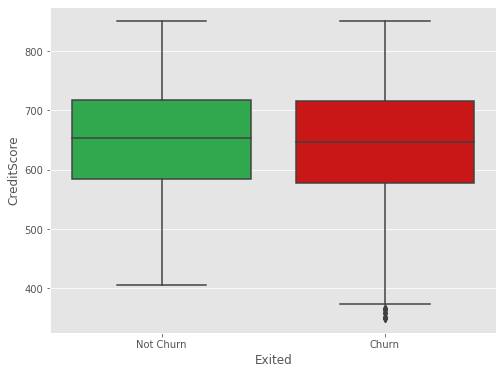

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=bank_customer_df,
           palette={0: '#32a84e', 1: '#c91616'}, saturation=1)
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

#### Observation:

* The size of boxes are nearly same.
* It is surprising that the maximum value of the `CreditScore` for both the existing and left customers is same
* The median value of `CreditScore` is approximately similar for churned and not churned customers
* One thing can be concluded that if the `CreditScore` is less than 400, the customer will definitely exit the bank

#### 3.1.6.2 Credit Score vs Churn by Country

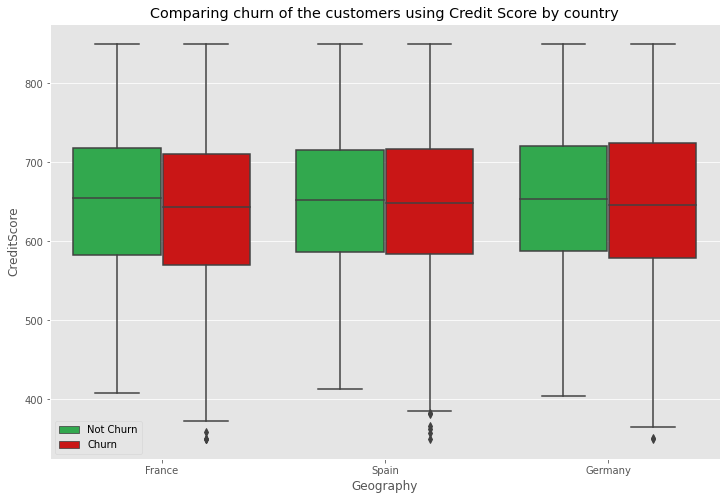

In [18]:
plt.figure(figsize=(12, 8))

ax = sns.boxplot(x='Geography', y='CreditScore', hue='Exited',
                 data=bank_customer_df,
                 palette={0: '#32a84e', 1: '#c91616'}, saturation=1)
plt.title('Comparing churn of the customers using Credit Score by country')
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Not Churn', 'Churn'])
plt.show()

#### Observation:

* The median value of **CreditScore** for **Not Churn** is same for all countries
* The median value of **CreditScore** for **Not Churn** is similar for all the countries

### 3.1.7 How CreditScore and Balance is affecting the churn?

#### 3.1.7.1 CreditScore vs Balance

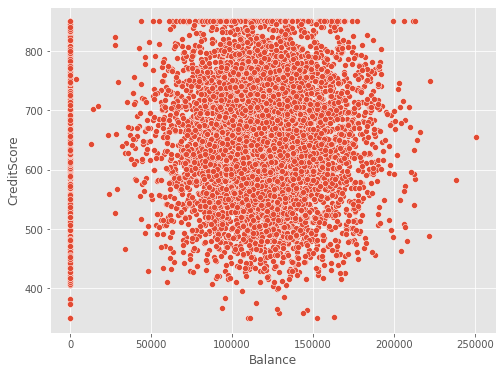

In [19]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Balance', y='CreditScore', data=bank_customer_df)
plt.show()

**Conclusion:** There is no relation between `CreditScore` and `Balance`